In [1]:
import pandas

In [12]:
dogs = pandas.Series(data=[1,2,3,4])
happiness = pandas.Series(data=[3,4,5,7])

In [13]:
df = pandas.DataFrame({'dogs': dogs,'happiness' : happiness})
df

,dogs,happiness
0,1,3
1,2,4
2,3,5
3,4,7


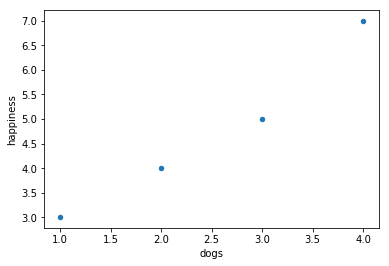

In [14]:
%matplotlib inline
df.plot.scatter('dogs','happiness')

In [17]:
import sklearn.linear_model
Regressor = sklearn.linear_model.TheilSenRegressor()


In [25]:
x = df[['dogs']]
x

,dogs
0,1
1,2
2,3
3,4


In [27]:
y = df.happiness
y

0    3
1    4
2    5
3    7
Name: happiness, dtype: int64

In [28]:
x = df[['dogs']]
y = df.happiness
Regressor.fit(x,y)

TheilSenRegressor(copy_X=True, fit_intercept=True, max_iter=300,
         max_subpopulation=10000, n_jobs=1, n_subsamples=None,
         random_state=None, tol=0.001, verbose=False)

In [48]:
Regressor.predict([[50],[10]])

array([ 53.15949134,  12.1991469 ])

In [53]:
Regressor.intercept_

1.959060787580152

import matplotlib.pyplot
matplotlib.pyplot.scatter(x,y)

In [52]:
Regressor.coef_

array([ 1.02400861])

# Sacramento House Prices
we will predict prices based on :
* Bedrooms
* Bathrooms
* Other

In [55]:
sacramento = pandas.read_csv('../../SYD_DAT_7/data/Sacramento-real-estate-transactions.csv')

In [56]:
sacramento

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768
5,5828 PEPPERMILL CT,SACRAMENTO,95841,CA,3,1,1122,Condo,Wed May 21 00:00:00 EDT 2008,89921,38.662595,-121.327813
6,6048 OGDEN NASH WAY,SACRAMENTO,95842,CA,3,2,1104,Residential,Wed May 21 00:00:00 EDT 2008,90895,38.681659,-121.351705
7,2561 19TH AVE,SACRAMENTO,95820,CA,3,1,1177,Residential,Wed May 21 00:00:00 EDT 2008,91002,38.535092,-121.481367
8,11150 TRINITY RIVER DR Unit 114,RANCHO CORDOVA,95670,CA,2,2,941,Condo,Wed May 21 00:00:00 EDT 2008,94905,38.621188,-121.270555
9,7325 10TH ST,RIO LINDA,95673,CA,3,2,1146,Residential,Wed May 21 00:00:00 EDT 2008,98937,38.700909,-121.442979


In [70]:
ransac = sklearn.linear_model.RANSACRegressor()

In [73]:
x = sacramento[ ['beds','baths', 'sq__ft','latitude','longitude','zip']]
y = sacramento.price

In [80]:
ransac.fit(x,y)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        loss='absolute_loss', max_trials=100, min_samples=None,
        random_state=None, residual_metric=None, residual_threshold=None,
        stop_n_inliers=inf, stop_probability=0.99, stop_score=inf)

In [81]:
ransac.estimator_.coef_

array([  -9935.54070164,   19616.93198412,     164.46884934,
         74772.70916865, -104764.02067594,    -430.00793494])

In [88]:
ransac_2 = sklearn.linear_model.TheilSenRegressor()

In [89]:
x_2 = sacramento[ ['beds','baths', 'sq__ft']]
y = sacramento.price

In [91]:
ransac_2.fit(x,y)

TheilSenRegressor(copy_X=True, fit_intercept=True, max_iter=300,
         max_subpopulation=10000, n_jobs=1, n_subsamples=None,
         random_state=None, tol=0.001, verbose=False)

In [93]:
ransac_2.coef_

array([  3.99877731e+04,   1.40997396e+05,   1.04903115e+02,
         2.38340622e+04,   2.25369051e+05,  -8.28590372e+01])

In [94]:
ransac_2.intercept_

34032085.262160614

In [96]:
Linear_3 = sklearn.linear_model.LinearRegression()

In [97]:
Linear_3.fit(x_2,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [99]:
Linear_3.coef_

array([ -8.01164405e+03,   6.18961061e+04,   1.93133645e+01])

In [100]:
Linear_3.intercept_

122108.40091355302

In [101]:
["%.2f" % (c,) for c in Linear_3.coef_]

['-8011.64', '61896.11', '19.31']

In [104]:
predictions = Linear_3.predict(x_2)
predictions

array([ 184127.19166465,  182508.2712587 ,  183354.6570853 ,
        184436.20549639,  183373.97044978,  181639.16985693,
        243187.63543901,  182701.40490354,  248051.20107826,
        243998.79674734,  239421.52936465,  246760.60786854,
        192814.80347171,  179669.20667957,  249615.58360146,
        251778.68042366,  184281.69858052,  183335.34372081,
        179337.47727264,  248054.60328896,  243458.02254179,
        239521.49839777,  237802.6089587 ,  252786.37758752,
        239267.02244878,  242878.62160727,  178568.34490398,
        243477.33590627,  240506.47998645,  245968.7599247 ,
        249943.91079768,  244114.67693424,  248518.12403657,
        243419.39581282,  249943.91079768,  249252.03188696,
        242762.74142037,  242283.30951897,  235987.15269721,
        190671.020014  ,  255061.95238592,  245176.91198086,
        242260.59394379,  250021.16425562,  244504.34643462,
        173588.89907783,  244369.15288323,  189715.5584219 ,
        245836.96858401,

In [105]:
import matplotlib.pyplot

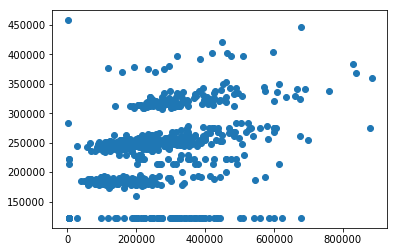

In [106]:
matplotlib.pyplot.scatter(sacramento.price,predictions)

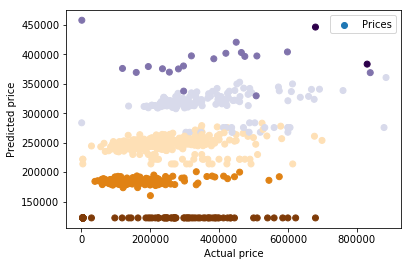

In [112]:
(fig,ax) = matplotlib.pyplot.subplots()
ax.scatter(sacramento.price, 
           predictions,cmap=matplotlib.pyplot.cm.PuOr, 
           c=sacramento.baths, label="Prices")
ax.set_xlabel("Actual price")
ax.set_ylabel ("Predicted price")
ax.legend(loc='best')

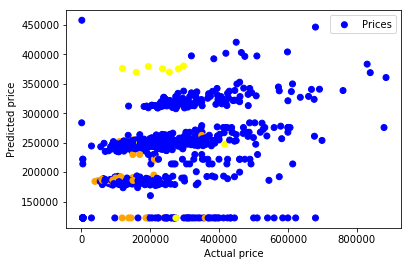

In [118]:
def colorme(x):
    if x == 'Residential' : return 'blue'
    if x == 'Condo' : return 'orange'
    if x == 'Multi-family': return 'pink'
    return "yellow"
(fig,ax) = matplotlib.pyplot.subplots()
ax.scatter(sacramento.price, 
           predictions,
           c=sacramento.type.map(colorme), label="Prices")
ax.set_xlabel("Actual price")
ax.set_ylabel ("Predicted price")
ax.legend(loc='best')